# Lab - Model selection

The aim of this lab session is to
* measure the empirical risk of a supervised learning model for different sample sizes (i.e. different quantities of training samples)
* select the optimal value and evaluate the generalisability of a supervised learning (classification) model using 
 * a division into training, validation and test data 
 * the principle of cross-validation

In [1]:
import numpy as np
import pandas as pd

import random

import seaborn as sn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Part 1. Data

The data used in this tutorial are images of handwritten numbers. Automatic recognition of these digits (and more generally of handwriting) is a classic but complex problem. It is used in particular in automatic mail sorting systems.
The data used for this tutorial corresponds to a simplified extract from the MNIST (Modified National Institute of Standards and Technology) data set, which originally contained 70,000 images of digits (0 to 9). 

Each image (i.e. an observation) is 8 pix in size. This corresponds to a vector made up of $d=64$ variables ($\mathbf{x}_i \in \mathbb{R}^d$ for $1\le i\le m$).

**Note**: The 8 pix $\times$ 8 pix thumbnails are obtained by applying a dimension reduction to the original 32 pix $\times$ 32 pix binary images. The original images were cut into blocks of 4 $\times$ 4 pix. (with no overlap). In each block, the number of "1s" used as new pixel values was counted to create a (non-binary) image of size 8 pix. $\times$ 8 pix with each pixel able to have a value between 0 and 16.

In [2]:
#-- Downloading the data
digits = datasets.load_digits()
X = digits.data
Y = digits.target
#print(digits.DESCR)

<Figure size 640x480 with 0 Axes>

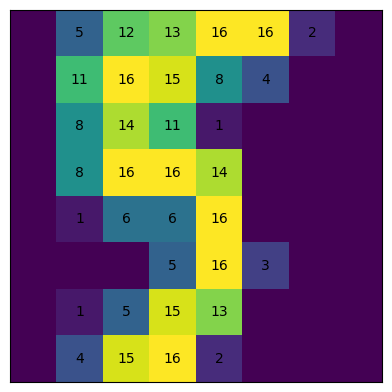

Variables:  [ 0.  5. 12. 13. 16. 16.  2.  0.  0. 11. 16. 15.  8.  4.  0.  0.  0.  8.
 14. 11.  1.  0.  0.  0.  0.  8. 16. 16. 14.  0.  0.  0.  0.  1.  6.  6.
 16.  0.  0.  0.  0.  0.  0.  5. 16.  3.  0.  0.  0.  1.  5. 15. 13.  0.
  0.  0.  0.  4. 15. 16.  2.  0.  0.  0.]
Label:  5


<Figure size 640x480 with 0 Axes>

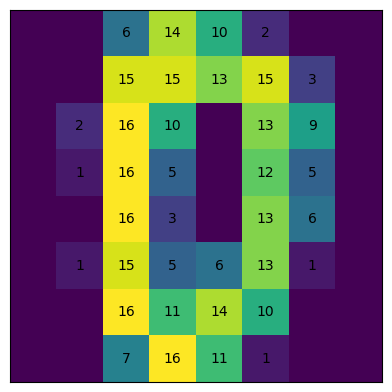

Variables:  [ 0.  0.  6. 14. 10.  2.  0.  0.  0.  0. 15. 15. 13. 15.  3.  0.  0.  2.
 16. 10.  0. 13.  9.  0.  0.  1. 16.  5.  0. 12.  5.  0.  0.  0. 16.  3.
  0. 13.  6.  0.  0.  1. 15.  5.  6. 13.  1.  0.  0.  0. 16. 11. 14. 10.
  0.  0.  0.  0.  7. 16. 11.  1.  0.  0.]
Label:  0


In [3]:
#-- Data visualisation
# disp_imgno = [5, 13] # Test other values
disp_imgno = [15,36]
for ll in disp_imgno:
    plt.figure()
    plt.matshow(digits.images[ll])
    for (i, j), z in np.ndenumerate(digits.images[ll]):
        if z!=0:
            plt.text(j, i, '{:d}'.format(int(z)), ha='center', va='center')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.show()
    print("Variables: ", X[ll,:])
    print("Label: ", Y[ll])

**Questions** : 
* What is the link between the images (`digit.images[ll]`) and the variables (`X[ll,:]`) + the labels (`Y[ll]`)? 
* What is the number of training data?

**Answer:**
1. The `digit.images[ll]` is the 8x8 images of the digit of the defined indices, `X[ll,:]` is the pixel values of each of these images as a 1D vector/array 
and `Y[ll]` is the actual number/digit seen in this image 
2. training data (`X.shape`) = 1797 

## Part 2. Influence of the sample size
The objective here is to evaluate the performance of a classification algorithm (empirical risk and real risk), the $k$-Nearest Neighbours (NN), when the number of training data increases ($m$).

### 1. Empiric risk

**2.1.a** Apply a $k$-PPV with $k=1$. Calculate the error rate (which corresponds to the empirical risk $\mathcal{R}_{emp}$) and explain the result.

**Tips**: 
* You can use the $k$-PPV algorithm from Scikit-Learn: [doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Find the name of the hyperparameter that allows you to set the number of neighbours considered during learning ($k$).
* The error rate is equal to 1 - Overall Accuracy. You can implement your own function or use Scikit-Learn fonctionalities

In [4]:
# k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, Y)  

# error rate
y_pred = knn.predict(X)
OA = accuracy_score(Y, y_pred)
print("Error rate: ", 1- OA)


Error rate:  0.0


**2.1.b** Apply a $k$-PPV with $k=5$. Calculate the error rate $\mathcal{R}_{emp}$ and display the confusion matrix.

**Tip**: 
Let `C` be your confusion matrix.
* For a simple display of the confusion matrix :
``` 
plt.figure()
plt.imshow(C)
plt.show()
```
* For a more elaborate display with Seaborn :
```
labels = data.target_names
df_cm = pd.DataFrame(C, index = [i for i in labels],columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')
```

Error rate:  0.009460211463550361


<Axes: >

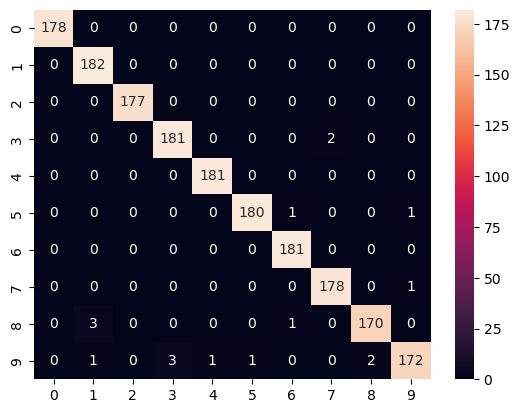

In [5]:
# k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, Y)  

# error rate
y_pred = knn.predict(X)
OA = accuracy_score(Y, y_pred)
print("Error rate: ", 1 - OA)

# confusion matrix
C = confusion_matrix(Y, y_pred)

# plot confusion matrix
labels = digits.target_names
df_cm = pd.DataFrame(C, index = [i for i in labels],columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')


**2.1.c** Plot the evolution of the empirical risk, for $k=5$, as a function of the size of the training data.
* Define the different training sizes: `size = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1500]`.
* Draw a random sample of the given size.
Note: you can also use the `random.sample` method in the `random` module.
* Apply a $5$-PPV for each sample size and calculate $\mathcal{R}_{emp}$ the empirical risk.
* Plot the evolution of the empirical risk as a function of sample size: $\mathcal{R}_{emp}=f(size)$.

**Comment**

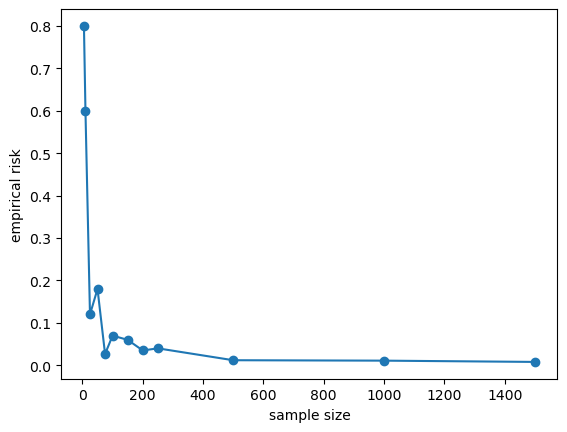

In [6]:
size = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1500]

# set seed
random.seed(0)

# empty list to store empiric risk
errors = []

for s in size:
    # select random sample of size s
    subset_indices = random.sample(range(len(X)), s)
    X_subset = X[subset_indices]
    Y_subset = Y[subset_indices]
    
    # model fit
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_subset, Y_subset)
    y_subset_pred = knn.predict(X_subset)
    
    # error rate
    OA = accuracy_score(Y_subset, y_subset_pred)
    error_rate = 1 - OA
    errors.append(error_rate)


# plot empirical risk as a function of sample size
plt.figure()
plt.plot(size, errors, marker='o')  
plt.xlabel('sample size')
plt.ylabel('empirical risk')
plt.show()


### 2. True risk and generalisation error, $k$ fixed

**2.2.a** Calculate an estimate of the generalisation error using a training and test set ($N=297$), for the different training sample sizes tested above (size), and always considering a $5$-PPV.
* Randomly divide the samples into training and test subsets: ` Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=N)` where `N` is the desired test sample size.
* Superimpose the two curves showing the evolution of the empirical risk and the real risk as a function of the size of the training sample. Feel free to display the curves only for the largest training sample sizes.

**Compare and comment**

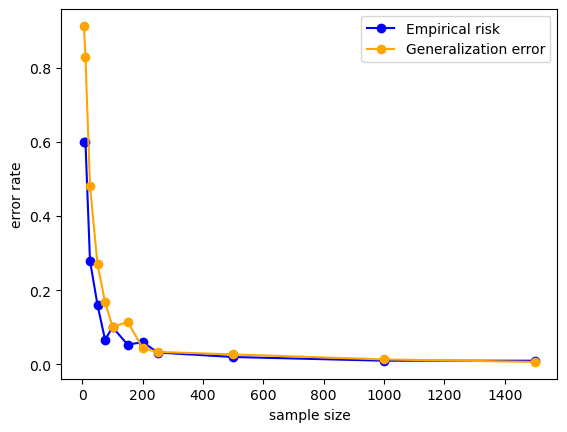

In [7]:
size = [5, 10, 25, 50, 75, 100, 150, 200, 250, 500, 1000, 1500]

# set seed
random.seed(0)

# train-test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=297)   

# empty lists to store error rates
errors = []
gen_errors = []

for s in size:
    # select random sample of size s
    subset_indices = random.sample(range(len(Xtrain)), s)
    Xtrain_subset = Xtrain[subset_indices]
    Ytrain_subset = Ytrain[subset_indices]
    
    # model fit
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(Xtrain_subset, Ytrain_subset)
    
    # empirical error rate
    ytrain_pred = knn.predict(Xtrain_subset)
    OA = accuracy_score(Ytrain_subset, ytrain_pred)
    error_rate = 1 - OA
    errors.append(error_rate)

    # generalization error
    Ytest_pred = knn.predict(Xtest)
    OA = accuracy_score(Ytest, Ytest_pred)
    gen_error = 1 - OA
    gen_errors.append(gen_error)


# plot empirical risk as a function of sample size
plt.figure()
plt.plot(size, errors, marker='o', color='blue', label='Empirical risk')
plt.plot(size, gen_errors, marker='o', color='orange', label='Generalization error')
plt.legend() 
plt.xlabel('sample size')
plt.ylabel('error rate')
plt.show()

**2.2.b** Up to now, the results have been obtained for a single repetition, although the results depend on the split between the training and test data. This procedure is generally repeated several times in order to obtain the mean and variance of the results.

Repeat the previous procedure (2.2.a) 20 times, and calculate the mean empirical and true risks, as well as the associated variances. Compare the results with those obtained from a single repetition.

**Tip**: you can display the results using plt.errorbar() to display the curve +/- one standard deviation.

**Comment**

In [8]:
# set seed
random.seed(0)

errors_rep = []
gen_errors_rep = []

# repeat 20 times
for split in range(20):
    # train-test split
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=297)   

    # empty lists to store error rates
    errors_ = []
    gen_errors_ = []

    for s in size:
        # select random sample of size s
        subset_indices = random.sample(range(len(Xtrain)), s)
        Xtrain_subset = Xtrain[subset_indices]
        Ytrain_subset = Ytrain[subset_indices]
        
        # model fit
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(Xtrain_subset, Ytrain_subset)
        
        # empirical error rate
        ytrain_pred = knn.predict(Xtrain_subset)
        OA = accuracy_score(Ytrain_subset, ytrain_pred)
        error_rate_ = 1 - OA
        errors_.append(error_rate_)

        # generalization error
        Ytest_pred = knn.predict(Xtest)
        OA = accuracy_score(Ytest, Ytest_pred)
        gen_error_ = 1 - OA
        gen_errors_.append(gen_error_)

    errors_rep.append(errors_)
    gen_errors_rep.append(gen_errors_) 

# mean and variance over all repetitions
mean_errors = np.mean(np.array(errors_rep),axis=0)
std_errors = np.std(np.array(errors_rep),axis=0)
mean_gen = np.mean(np.array(gen_errors_rep),axis=0)
std_gen = np.std(np.array(gen_errors_rep),axis=0)

# put in dataframe
df = pd.DataFrame({
    'Training_size': size,
    'Single_empirical': errors,
    'Mean_empirical_rep': mean_errors,
    'Std_empirical_rep': std_errors,
    'Single_gen': gen_errors,
    'Mean_gen_rep': mean_gen,
    'Std_gen_rep': std_gen
})

df

,Training_size,Single_empirical,Mean_empirical_rep,Std_empirical_rep,Single_gen,Mean_gen_rep,Std_gen_rep
0,5,0.600000,0.670000,0.145258,0.912458,0.900168,0.016366
1,10,0.600000,0.500000,0.122474,0.828283,0.781987,0.048628
2,25,0.280000,0.248000,0.074404,0.481481,0.499495,0.048211
3,50,0.160000,0.132000,0.049558,0.269360,0.297643,0.058487
4,75,0.066667,0.094000,0.038058,0.168350,0.188215,0.044857
5,100,0.100000,0.078500,0.027798,0.101010,0.145960,0.035414
6,150,0.053333,0.049667,0.015560,0.114478,0.098316,0.023147
7,200,0.060000,0.042500,0.009937,0.043771,0.076263,0.018694
8,250,0.032000,0.033400,0.008969,0.033670,0.063131,0.014477
9,500,0.020000,0.018600,0.005731,0.026936,0.033838,0.009901


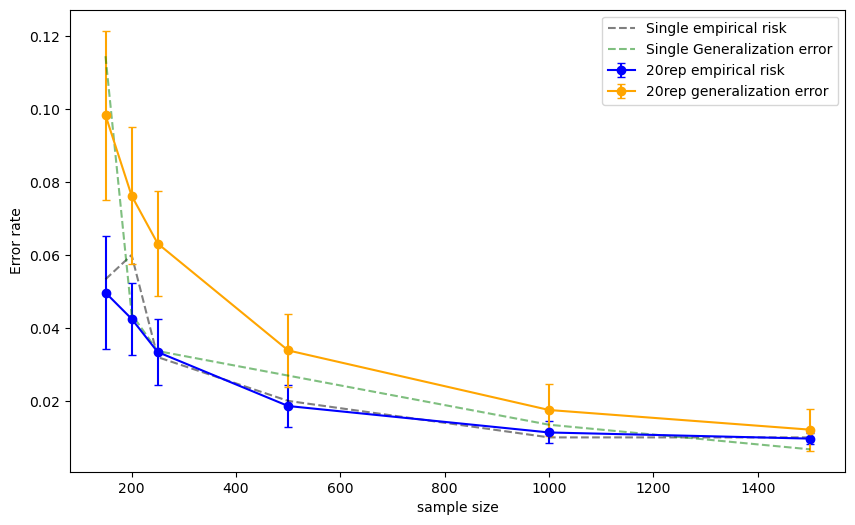

In [9]:
plt.figure(figsize=(10,6))

plt.errorbar(size[-6:], mean_errors[-6:], yerr=std_errors[-6:], marker='o', color='blue', capsize=3, label='20rep empirical risk')
plt.plot(size[-6:], errors[-6:], color='black', alpha=0.5, linestyle='--', label='Single empirical risk')

plt.errorbar(size[-6:], mean_gen[-6:], yerr=std_gen[-6:], marker='o', color='orange', capsize=3, label='20rep generalization error')
plt.plot(size[-6:], gen_errors[-6:],  color='green', alpha=0.5, linestyle='--',label='Single Generalization error')

plt.xlabel('sample size')
plt.ylabel('Error rate')
plt.legend()
plt.show()

**2.2.c** Carry out a cross validation on 5 subsets / partitions (*$5$-fold cross validation*) on all the training data (always with the $5$-PPV). Give an estimate of the generalisation error: `scores = cross_val_score(knn, X, Y, cv=5)` [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score).

**Question**: What is the average Overall Accuracy value you obtain?

In [10]:
# model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, Y)
    
scores = cross_val_score(knn, X, Y, cv =5)

scores.mean()

np.float64(0.9627282575054161)

**Your answer**:   
Overall accuracy = 0.96

## Part 3. Selecting the best $k$-hyperparameter (of the $k$-PPV) and estimating generalisation

The aim of this part is to determine the best value for the $k$ hyperparameter of the PPV algorithm and to evaluate the generalisation performance.

**3.1** Plot the evolution of the empirical risk for $k\in [1,30]$. **Comment**

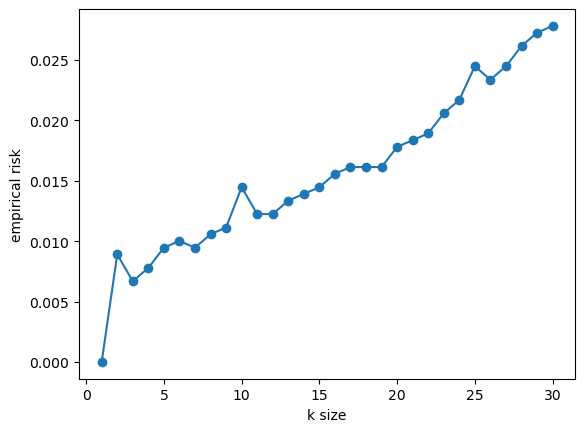

In [11]:
k_size = range(1,31) 

# initiate empty list
errors = []

for i in k_size:    
    # model fit
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    
    # error rate
    Y_pred = knn.predict(X)
    OA = accuracy_score(Y, Y_pred)
    error_rate = 1 - OA
    errors.append(error_rate)


# plot empirical risk as a function of sample size
plt.figure()
plt.plot(k_size, errors, marker='o')  
plt.xlabel('k size')
plt.ylabel('empirical risk')
plt.show()


**Your comment**:  
Empirical risk increases as size of K increases. This is because a smaller K , the model overfits hence 0 training error and with a larger K, the model has more neighbours to look at however this may lead to misclassification hence increase in training error.

**3.2** Create a training set containing 80% of the data. The remaining 20% will be test data.

In [12]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

**3.3** For $k\in [1,30]$, perform a 5 subset cross-validation (*$5$-fold cross-validation*) on the training dataset. The same training dataset will be considered.

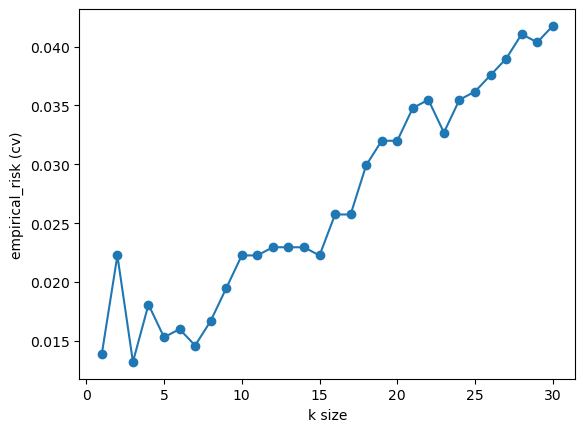

In [13]:
k_size = range(1,31) 

# initiate empty list
cv_results = []

for i in k_size:    
    # model fit
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    
    scores = cross_val_score(knn, X_train, Y_train, cv =5)
    scores = 1 - (scores.mean())
    cv_results.append(scores)

# plot
plt.figure()
plt.plot(k_size, cv_results, marker='o')  
plt.xlabel('k size')
plt.ylabel('empirical_risk (cv)')
plt.show()


**3.4** What is the best value of $k$ to choose?

**Your answer:**  
best value of k = 3

**3.5** For this optimal value of $k$, give an estimate of the real risk. The learning step will be carried out on the training and validation data.

In [14]:
# model fit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# generalization error
Y_test_pred = knn.predict(X_test)
OA = accuracy_score(Y_test, Y_test_pred)
error = 1 - OA
print(error)


0.01666666666666672


**3.6** Compute the confusion matrix for the model. What do you think of this model?

<Axes: >

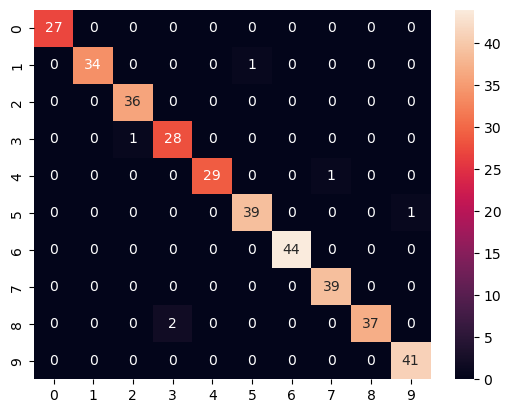

In [15]:
# confusion matrix
C = confusion_matrix(Y_test, Y_test_pred)

# plot confusion matrix
labels = digits.target_names
df_cm = pd.DataFrame(C, index = [i for i in labels],columns = [i for i in labels])
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')

**Your answer:**   
The model generalizes well.  
It shows high accuracy with majority of the prediction being true positives. Only 4 digits misclassified and only with less than 3 in each class.


**3.7** Finally, give an estimate of the real risk by implementing a nested cross validation (with $k=10$ for the outter loop).

What is the value of the average real risk you obtain?

In [ ]:
k_size = range(1, 31)

outer_errors = []

for i in range(10): # 10-fold CV
    # outer loop
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    # inner loop: to choose best k
    cv_results = []
    for k in k_size:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, Y_train, cv=5)
        cv_results.append(1 - scores.mean())

    best_k = k_size[np.argmin(cv_results)]

    # evaluate on outer test set
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train, Y_train)
    outer_error = 1 - knn_best.score(X_test, Y_test)
    outer_errors.append(outer_error)

print("Estimated real risk:", np.mean(outer_errors))


Estimated real risk: 0.015277777777777769


**Your answer**  
The average real risk: 0.015